In [1]:
import os
import requests
import pandas as pd
import numpy as np
import json

from pathlib import Path
import csv

from dotenv import load_dotenv
load_dotenv()

import pandas_datareader as web
import datetime as dt

# import panel as pn
# from panel.interact import interact
# import plotly.express as px
# pn.extension("plotly")

%matplotlib inline

In [2]:
header = "SETTLEMENT DATE|CUSIP|SYMBOL|QUANTITY (FAILS)|DESCRIPTION|PRICE"

#ftd_path = Path("Resources/sec_ftd_1.csv")

def read_ftd_file(csv_path, cusip_number, symbol):
    data = pd.read_csv(
    Path(csv_path),
    index_col=False
    )
    
    #header = "SETTLEMENT DATE|CUSIP|SYMBOL|QUANTITY (FAILS)|DESCRIPTION|PRICE"
    data[header] = data[header].str.replace('|',',')
    new_data = data.rename(columns={header:'SETTLEMENT_DATE,CUSIP,SYMBOL,QUANTITY_FAILS,DESCRIPTION,PRICE'})
    Header = "Header"
    new_data = data.rename(columns={header:Header})
    
    #new_df = pd.DataFrame()     - not needed apparently 
    new_data = new_data.Header.str.split(",",expand=True)
    new_data = new_data.rename(columns={0:'Date',1:'CUSIP',2:'SYMBOL',3:'QUANTITY_FAILS',4:'DESCRIPTION',5:'PRICE'})
    
    new_data = new_data.set_index("CUSIP")
    new_data = new_data.loc[cusip_number]
    
    new_data = new_data[['Date','QUANTITY_FAILS','PRICE']]
    new_data.rename(columns={'PRICE':symbol},inplace=True)
    new_data.set_index('Date',inplace=True)  
    
    new_data = new_data.reset_index()
    new_data['Date'] = pd.to_datetime(new_data['Date'])
    new_data.set_index('Date',inplace=True)
    new_data = new_data[['QUANTITY_FAILS']]
    new_data.rename(columns={'QUANTITY_FAILS':symbol+'_QUANTITY_FAILS'},inplace=True)
    
    return new_data

def concat_df(df_1,df_2):
    df = pd.concat([df_1,df_2],axis='rows')
    return df

In [3]:
csv_file_1 = Path("Resources/sec_ftd_202012a.csv")
csv_file_2 = Path("Resources/sec_ftd_202012b.csv")
csv_file_3 = Path("Resources/sec_ftd_202101a.csv")
csv_file_4 = Path("Resources/sec_ftd_202101b.csv")
csv_file_5 = Path("Resources/sec_ftd_202102a.csv")
csv_file_6 = Path("Resources/sec_ftd_202102b.csv")
csv_file_7 = Path("Resources/sec_ftd_202103a.csv")
csv_file_8 = Path("Resources/sec_ftd_202103b.csv")
csv_file_9 = Path("Resources/sec_ftd_202104a.csv")
csv_file_10= Path("Resources/sec_ftd_202104b.csv")
csv_file_11= Path("Resources/sec_ftd_202105a.csv")
csv_file_12= Path("Resources/sec_ftd_202105b.csv")
csv_file_13= Path("Resources/sec_ftd_202106a.csv")
csv_file_14= Path("Resources/sec_ftd_202106b.csv")
csv_file_15= Path("Resources/sec_ftd_202107a.csv")
csv_file_16= Path("Resources/sec_ftd_202107b.csv")
csv_file_17= Path("Resources/sec_ftd_202108a.csv")
csv_file_18= Path("Resources/sec_ftd_202108b.csv")

In [4]:
CUSIP_number = "36467W109"
symbol = 'GME'

gme_df_1 = read_ftd_file(csv_path=csv_file_1 ,cusip_number=CUSIP_number,symbol=symbol)
gme_df_2 = read_ftd_file(csv_path=csv_file_2 ,cusip_number=CUSIP_number,symbol=symbol)
gme_df_3 = read_ftd_file(csv_path=csv_file_3 ,cusip_number=CUSIP_number,symbol=symbol)
gme_df_4 = read_ftd_file(csv_path=csv_file_4 ,cusip_number=CUSIP_number,symbol=symbol)
gme_df_5 = read_ftd_file(csv_path=csv_file_5 ,cusip_number=CUSIP_number,symbol=symbol)
gme_df_6 = read_ftd_file(csv_path=csv_file_6 ,cusip_number=CUSIP_number,symbol=symbol)
gme_df_7 = read_ftd_file(csv_path=csv_file_7 ,cusip_number=CUSIP_number,symbol=symbol)
gme_df_8 = read_ftd_file(csv_path=csv_file_8 ,cusip_number=CUSIP_number,symbol=symbol)
gme_df_9 = read_ftd_file(csv_path=csv_file_9 ,cusip_number=CUSIP_number,symbol=symbol)
gme_df_10= read_ftd_file(csv_path=csv_file_10,cusip_number=CUSIP_number,symbol=symbol)
gme_df_11= read_ftd_file(csv_path=csv_file_11,cusip_number=CUSIP_number,symbol=symbol)
gme_df_12= read_ftd_file(csv_path=csv_file_12,cusip_number=CUSIP_number,symbol=symbol)
gme_df_13= read_ftd_file(csv_path=csv_file_13,cusip_number=CUSIP_number,symbol=symbol)
gme_df_14= read_ftd_file(csv_path=csv_file_14,cusip_number=CUSIP_number,symbol=symbol)
gme_df_15= read_ftd_file(csv_path=csv_file_15,cusip_number=CUSIP_number,symbol=symbol)
gme_df_16= read_ftd_file(csv_path=csv_file_16,cusip_number=CUSIP_number,symbol=symbol)
gme_df_17= read_ftd_file(csv_path=csv_file_17,cusip_number=CUSIP_number,symbol=symbol)
gme_df_18= read_ftd_file(csv_path=csv_file_18,cusip_number=CUSIP_number,symbol=symbol)

C:\Users\watso\AppData\Local\Temp/ipykernel_9608/2897867299.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[header] = data[header].str.replace('|',',')


In [5]:
gme_df = concat_df(gme_df_1,gme_df_2)
gme_df = concat_df(gme_df,gme_df_3)
gme_df = concat_df(gme_df,gme_df_4)
gme_df = concat_df(gme_df,gme_df_5)
gme_df = concat_df(gme_df,gme_df_6)
gme_df = concat_df(gme_df,gme_df_7)
gme_df = concat_df(gme_df,gme_df_8)
gme_df = concat_df(gme_df,gme_df_9)
gme_df = concat_df(gme_df,gme_df_10)
gme_df = concat_df(gme_df,gme_df_11)
gme_df = concat_df(gme_df,gme_df_12)
gme_df = concat_df(gme_df,gme_df_13)
gme_df = concat_df(gme_df,gme_df_14)
gme_df = concat_df(gme_df,gme_df_15)
gme_df = concat_df(gme_df,gme_df_16)
gme_df = concat_df(gme_df,gme_df_17)
gme_df = concat_df(gme_df,gme_df_18)
#gme_df = concat_df(gme_df,gme_df_19)

gme_df

,GME_QUANTITY_FAILS
Date,
2020-12-01,91971
2020-12-02,1061397
2020-12-03,1787191
2020-12-04,999475
2020-12-07,1002379
...,...
2021-08-25,2363
2021-08-26,10983
2021-08-30,21332


In [20]:
gme_df.to_csv('Resources/gme_ftd_df.csv')
gme_df = pd.read_csv(
    Path("Resources/gme_ftd_df.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
)
gme_df

,GME_QUANTITY_FAILS
Date,
2020-12-01,91971
2020-12-02,1061397
2020-12-03,1787191
2020-12-04,999475
2020-12-07,1002379
...,...
2021-08-24,7278
2021-08-25,2363
2021-08-26,10983


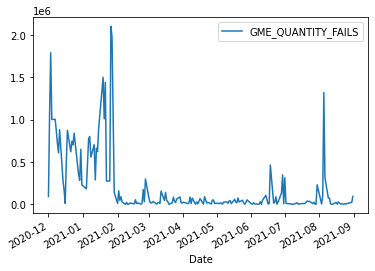

In [21]:
plot = gme_df.plot()

In [22]:
# import pandas as pd
# import glob

# path = r'C:\DRO\DCL_rawdata_files' # use your path
# all_files = glob.glob(path + "/*.csv")

# li = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     li.append(df)

# frame = pd.concat(li, axis=0, ignore_index=True)